# TIME SERIES MODELLING FOR PREDICTIONS (DATA TILL 03.07.2020)

In [1435]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
plt.style.use('seaborn')

CovidDF = pd.read_csv("States_covid_19_india.csv")


In [1436]:
CovidDF.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1
2,3,01/02/20,6:00 PM,Kerala,2,0,0,0,2
3,4,02/02/20,6:00 PM,Kerala,3,0,0,0,3
4,5,03/02/20,6:00 PM,Kerala,3,0,0,0,3


In [1437]:
Predict  = CovidDF[['Date','Confirmed','Cured']].set_index('Date')
Predict

,Confirmed,Cured
Date,,
30/01/20,1,0
31/01/20,1,0
01/02/20,2,0
02/02/20,3,0
03/02/20,3,0
...,...,...
03/07/20,1435,1146
03/07/20,2984,2405
03/07/20,24825,17221


In [1438]:
PredAG = Predict.groupby('Date',sort=False).sum()

In [1439]:
print(PredAG)

          Confirmed   Cured
Date                       
30/01/20          1       0
31/01/20          1       0
01/02/20          2       0
02/02/20          3       0
03/02/20          3       0
...             ...     ...
29/06/20     548318  321723
30/06/20     566840  334822
01/07/20     585493  347979
02/07/20     604641  359860
03/07/20     625544  379892

[156 rows x 2 columns]


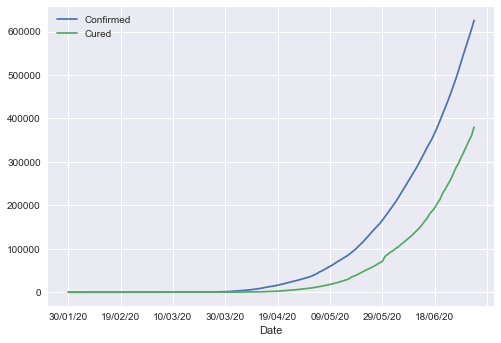

In [1440]:
PredAG.plot()
plt.show()

# TIME-SERIES MODELLING OF CONFIRMED CASES FOR PREDICTIONS

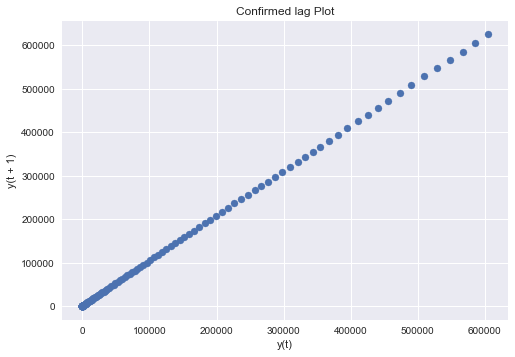

In [1441]:
pd.plotting.lag_plot(PredAG['Confirmed'])
plt.title('Confirmed lag Plot')
plt.show()

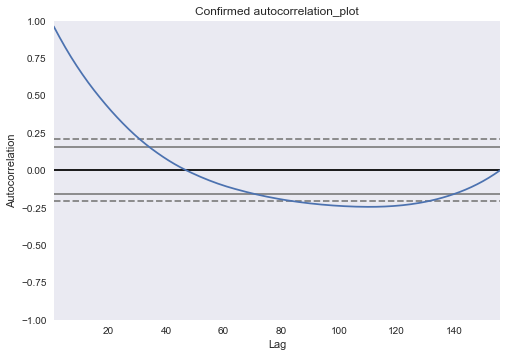

In [1442]:
pd.plotting.autocorrelation_plot(PredAG['Confirmed'])
plt.title('Confirmed autocorrelation_plot')
plt.show()

In [1443]:
print('The resulting chart contains a few lines on it separate from the autocorrelation function. The dark horizontal line at zero just denotes the zero line, the lighter full horizontal lines is the 95% confidence level and the dashed horizontal lines are 99% confidence levels, which means that correlations are more significant if they occur at those levels.')
print('\nwe can see there’s some significant correlation between t=1 and t=28')

The resulting chart contains a few lines on it separate from the autocorrelation function. The dark horizontal line at zero just denotes the zero line, the lighter full horizontal lines is the 95% confidence level and the dashed horizontal lines are 99% confidence levels, which means that correlations are more significant if they occur at those levels.

we can see there’s some significant correlation between t=1 and t=28


In [1444]:
PredAG['Confirmed'].corr(PredAG['Confirmed'].shift(28))

0.9893622550615081

In [1445]:
print('The above command gives us a correlation value of 0.989 which is quite high')

The above command gives us a correlation value of 0.989 which is quite high


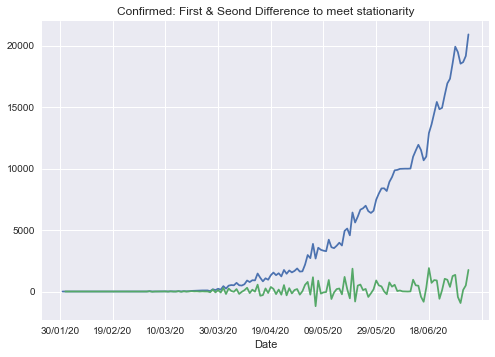


From Original Confirmded cases plot it can be visulaly seen that data is not stationary. Stationarity conditon achieved after second difference

Thus acceleration of Confiremd cases is stationary

We ignore Seasonility to kee it simple. Later we will use Moving Averages MA for Smoothening


In [1446]:
PredAG['I1']=PredAG['Confirmed'].diff()
PredAG['I1'].plot()
PredAG['I2']=PredAG['I1'].diff()
PredAG['I2'].plot(title = 'Confirmed: First & Seond Difference to meet stationarity')
plt.show()

print('\nFrom Original Confirmded cases plot it can be visulaly seen that data is not stationary. Stationarity conditon achieved after second difference')
print('\nThus acceleration of Confiremd cases is stationary')
print('\nWe ignore Seasonility to kee it simple. Later we will use Moving Averages MA for Smoothening')


In [1447]:
from statsmodels.tsa.ar_model import AR

In [1448]:
#create train/test datasets
X = PredAG['I2'].dropna()
train_data = X[1:len(X)-28]
test_data = X[X[len(X)-28:]]

#train the autoregression model
model = AR(train_data)
model_fitted = model.fit()

C:\Users\SUDIP SINGH\anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:691: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, FutureWarnin

In [1449]:
print('The lag value chose is: %s' % model_fitted.k_ar)

The lag value chose is: 13


In [1450]:
print('The coefficients of the model are:\n %s' % model_fitted.params)

The coefficients of the model are:
 const     46.406996
L1.I2     -0.437761
L2.I2      0.094402
L3.I2      0.071965
L4.I2     -0.122166
L5.I2      0.072481
L6.I2      0.339450
L7.I2      0.152526
L8.I2     -0.060930
L9.I2      0.088201
L10.I2     0.019646
L11.I2    -0.013816
L12.I2     0.183862
L13.I2     0.365805
dtype: float64


# TIME-SERIES MODELLING OF CURED CASES FOR PREDICTIONS

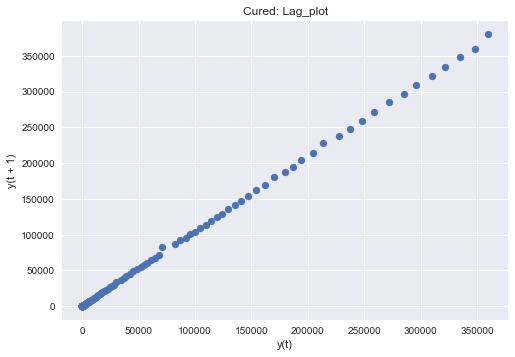

In [1451]:
pd.plotting.lag_plot(PredAG['Cured'])
plt.title('Cured: Lag_plot')
plt.show()

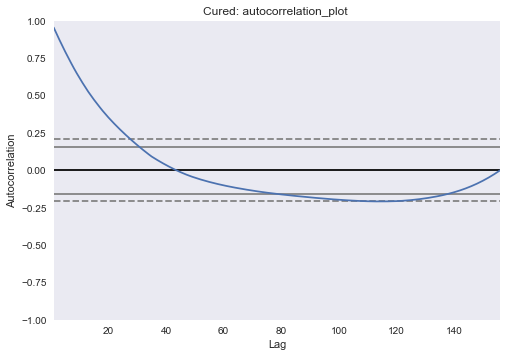

In [1452]:
pd.plotting.autocorrelation_plot(PredAG['Cured'])
plt.title('Cured: autocorrelation_plot ')
plt.show()

In [1453]:
print('The resulting chart contains a few lines on it separate from the autocorrelation function. The dark horizontal line at zero just denotes the zero line, the lighter full horizontal lines is the 95% confidence level and the dashed horizontal lines are 99% confidence levels, which means that correlations are more significant if they occur at those levels.')
print('\nwe can see there’s some significant correlation between t=1 and t=28')

The resulting chart contains a few lines on it separate from the autocorrelation function. The dark horizontal line at zero just denotes the zero line, the lighter full horizontal lines is the 95% confidence level and the dashed horizontal lines are 99% confidence levels, which means that correlations are more significant if they occur at those levels.

we can see there’s some significant correlation between t=1 and t=28


In [1454]:
PredAG['Cured'].corr(PredAG['Cured'].shift(28))

0.9825578861448936

In [1455]:
print('The above command gives us a correlation value of 0.982 which is quite high')

The above command gives us a correlation value of 0.982 which is quite high


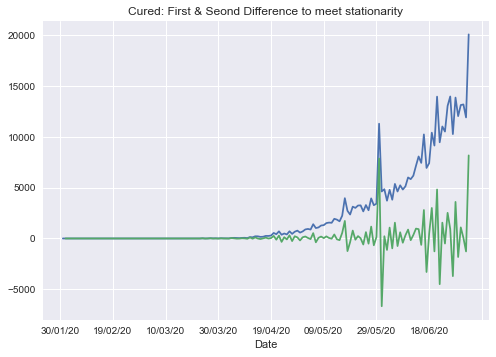


From Original Cured cases plot it can be visulaly seen that data is not stationary. Stationarity conditon achieved after second difference

Thus acceleration of Cured cases is stationary

We ignore Seasonility to kee it simple. Later we will use Moving Averages MA for Smoothening


In [1456]:
PredAG['I11']=PredAG['Cured'].diff()
PredAG['I11'].plot()
PredAG['I22']=PredAG['I11'].diff()
PredAG['I22'].plot(title = 'Cured: First & Seond Difference to meet stationarity')
plt.show()

print('\nFrom Original Cured cases plot it can be visulaly seen that data is not stationary. Stationarity conditon achieved after second difference')
print('\nThus acceleration of Cured cases is stationary')
print('\nWe ignore Seasonility to kee it simple. Later we will use Moving Averages MA for Smoothening')


In [1457]:
#create train/test datasets
X = PredAG['I22'].dropna()
train_data = X[1:len(X)-28]
test_data = X[X[len(X)-28:]]

#train the autoregression model
model = AR(train_data)
model_fitted = model.fit()

C:\Users\SUDIP SINGH\anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:691: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, FutureWarnin

In [1458]:
print('The lag value chose is: %s' % model_fitted.k_ar)

The lag value chose is: 13


In [1459]:
print('The coefficients of the model are:\n %s' % model_fitted.params)

The coefficients of the model are:
 const      70.974579
L1.I22     -0.550537
L2.I22     -0.178141
L3.I22     -0.498426
L4.I22     -0.255553
L5.I22     -0.439647
L6.I22     -0.291259
L7.I22     -0.252997
L8.I22      0.472167
L9.I22     -0.031449
L10.I22     0.487607
L11.I22     0.082329
L12.I22    -0.614479
L13.I22     2.523470
dtype: float64


# IMPROVED MODEL: ARIMA MODEL  

# PREDICTING CONFIRMED CASES

In [1460]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean =pd.Series(timeseries).rolling(window=12).mean()
    rolstd =pd.Series(timeseries).rolling(window=12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

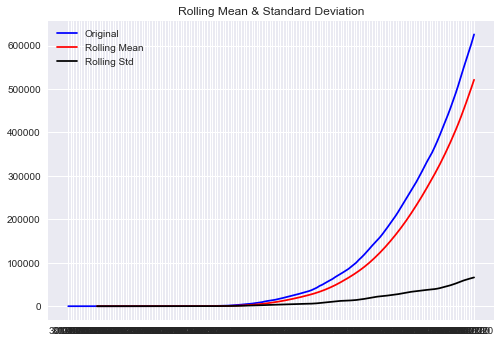

Results of Dickey-Fuller Test:
Test Statistic                  -0.693811
p-value                          0.848346
#Lags Used                      14.000000
Number of Observations Used    141.000000
Critical Value (1%)             -3.477601
Critical Value (5%)             -2.882266
Critical Value (10%)            -2.577822
dtype: float64


In [1461]:
test_stationarity(PredAG['Confirmed'])

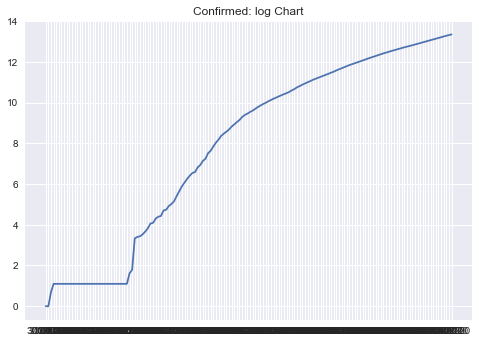

In [1462]:
ts_log1 = np.log(PredAG['Confirmed'])
plt.plot(ts_log1)
plt.title('Confirmed: log Chart')
plt.show()

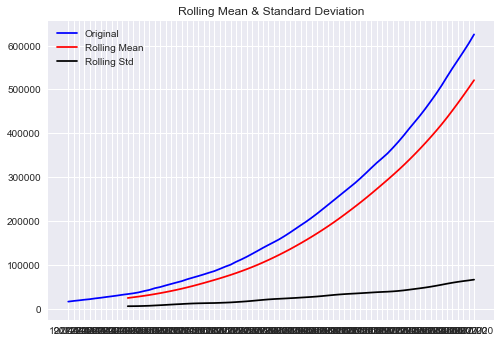

Results of Dickey-Fuller Test:
Test Statistic                  3.554637
p-value                         1.000000
#Lags Used                      1.000000
Number of Observations Used    74.000000
Critical Value (1%)            -3.521980
Critical Value (5%)            -2.901470
Critical Value (10%)           -2.588072
dtype: float64


In [1463]:
#REMOVING AUTOCORELATION UPTO FIRST 28 ROWS FROM BASIC MODEL AND ALSO ADDITIONAL 12 ROWS EVENT(STRUCTURAL BREAK IN DATA -- REEATED RUNS SUGGESTED REMOVE UPTO TOP 40 ROWS)
#REMOVED MORE ROWS TO ACCOMODATE ALL ASSUMPTIONS OF ARIMA
PredAG1 = PredAG.iloc[80:]
test_stationarity(PredAG1['Confirmed'])



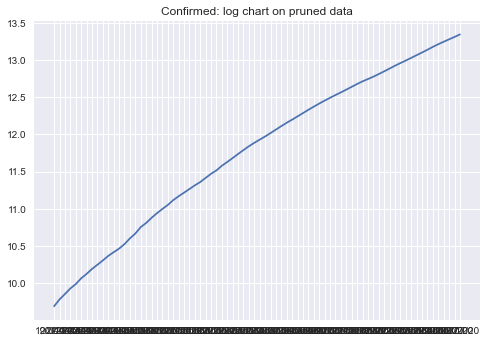

In [1464]:
ts_log = np.log(PredAG1['Confirmed'])
plt.plot(ts_log)
plt.title('Confirmed: log chart on pruned data')
plt.show()

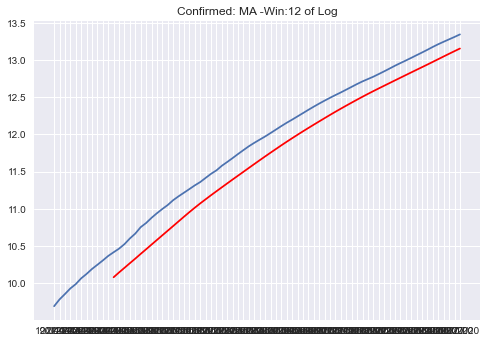

In [1465]:
moving_avg = pd.Series(ts_log).rolling(window=12).mean()
plt.plot(ts_log)
plt.plot(moving_avg, color='red')
plt.title('Confirmed: MA -Win:12 of Log')
plt.show()

In [1466]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.tail(12)

Date
22/06/20    0.197104
23/06/20    0.195844
24/06/20    0.195862
25/06/20    0.196785
26/06/20    0.197356
27/06/20    0.198993
28/06/20    0.201298
29/06/20    0.200984
30/06/20    0.197967
01/07/20    0.194437
02/07/20    0.191149
03/07/20    0.190024
Name: Confirmed, dtype: float64

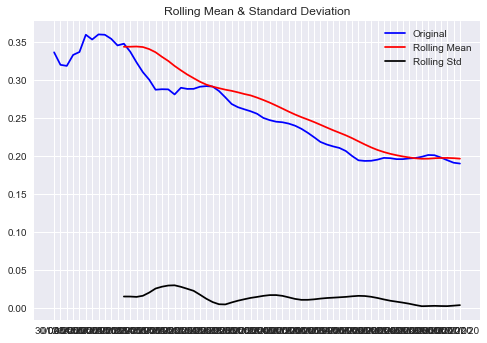

Results of Dickey-Fuller Test:
Test Statistic                 -2.204126
p-value                         0.204752
#Lags Used                      9.000000
Number of Observations Used    55.000000
Critical Value (1%)            -3.555273
Critical Value (5%)            -2.915731
Critical Value (10%)           -2.595670
dtype: float64


In [1467]:
ts_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(ts_log_moving_avg_diff)

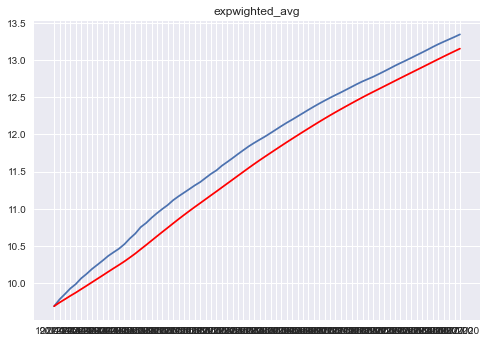

In [1468]:
expwighted_avg = pd.DataFrame.ewm(ts_log, span=12).mean()
plt.plot(ts_log)
plt.plot(expwighted_avg, color='red')
plt.title('expwighted_avg')
plt.show()

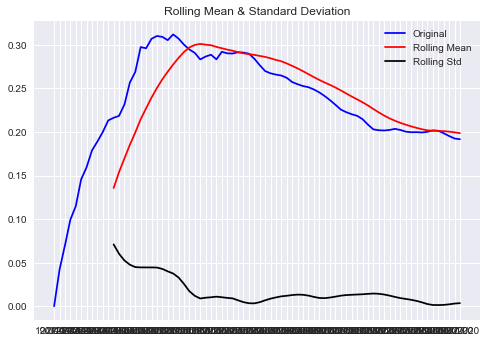

Results of Dickey-Fuller Test:
Test Statistic                 -2.839106
p-value                         0.052901
#Lags Used                     12.000000
Number of Observations Used    63.000000
Critical Value (1%)            -3.538695
Critical Value (5%)            -2.908645
Critical Value (10%)           -2.591897
dtype: float64


In [1469]:
ts_log_ewma_diff = ts_log - expwighted_avg
test_stationarity(ts_log_ewma_diff)

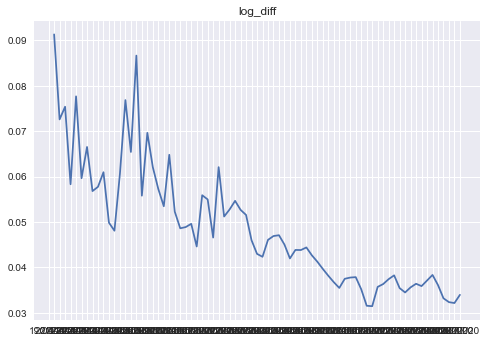

In [1470]:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)
plt.title('log_diff')
plt.show()

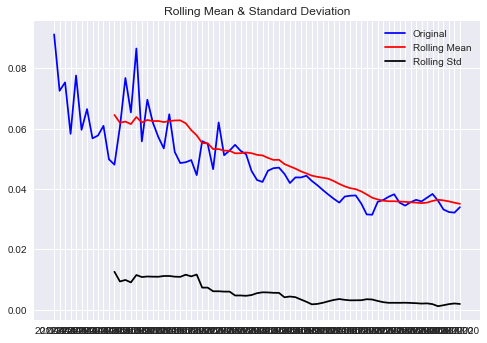

Results of Dickey-Fuller Test:
Test Statistic                 -1.004669
p-value                         0.751557
#Lags Used                     12.000000
Number of Observations Used    62.000000
Critical Value (1%)            -3.540523
Critical Value (5%)            -2.909427
Critical Value (10%)           -2.592314
dtype: float64


In [1471]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

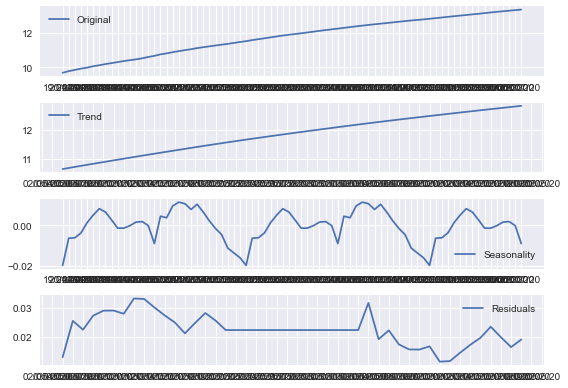

In [1472]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log, period=30)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

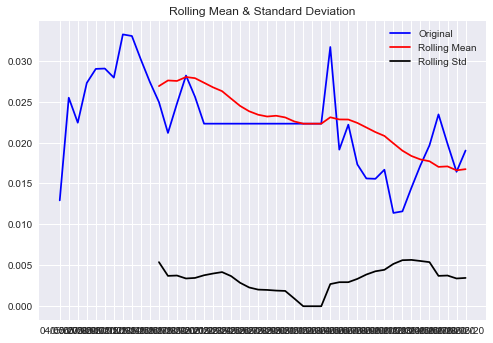

Results of Dickey-Fuller Test:
Test Statistic                 -2.971044
p-value                         0.037688
#Lags Used                      0.000000
Number of Observations Used    45.000000
Critical Value (1%)            -3.584829
Critical Value (5%)            -2.928299
Critical Value (10%)           -2.602344
dtype: float64


In [1473]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)

C:\Users\SUDIP SINGH\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


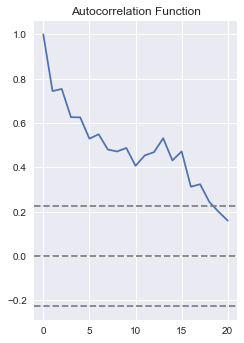

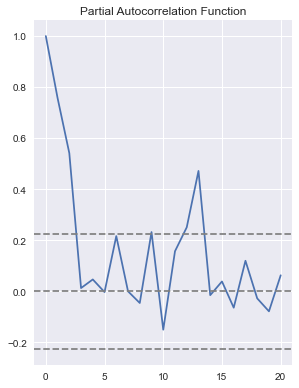

In [1474]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')
plt.show()
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()
plt.show()

In [1475]:
from statsmodels.tsa.arima_model import ARIMA

C:\Users\SUDIP SINGH\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\SUDIP SINGH\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)
C:\Users\SUDIP SINGH\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\SUDIP SINGH\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  '

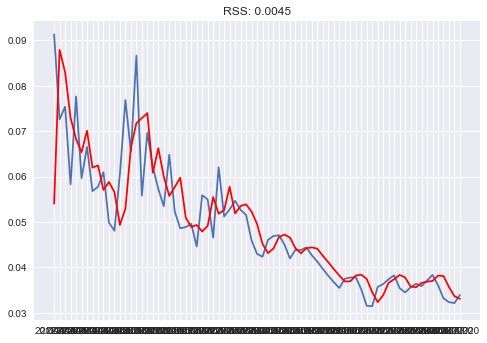

In [1476]:
model = ARIMA(ts_log, order=(2, 1, 0))  
results_MA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-ts_log_diff)**2))
plt.show()

C:\Users\SUDIP SINGH\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\SUDIP SINGH\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)
C:\Users\SUDIP SINGH\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\SUDIP SINGH\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  '

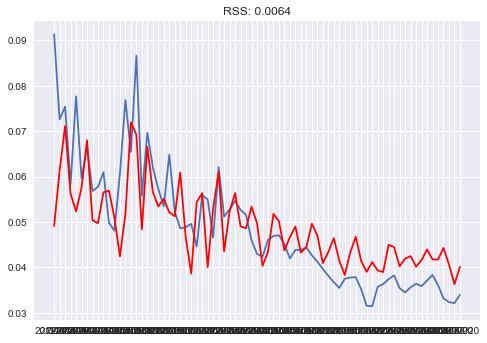

In [1477]:
model = ARIMA(ts_log, order=(0, 1, 2))  
results_MA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-ts_log_diff)**2))
plt.show()

C:\Users\SUDIP SINGH\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\SUDIP SINGH\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)
C:\Users\SUDIP SINGH\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\SUDIP SINGH\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  '

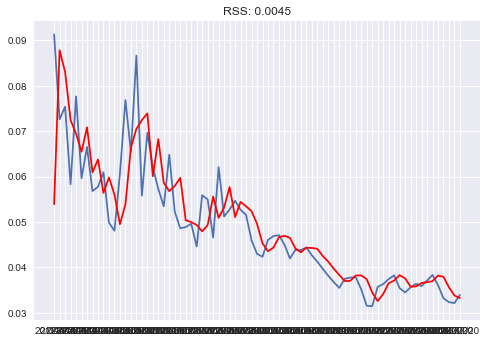

In [1478]:
model = ARIMA(ts_log, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))
plt.show()

In [1479]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

Date
20/04/20    0.053916
21/04/20    0.087792
22/04/20    0.083016
23/04/20    0.072435
24/04/20    0.069428
dtype: float64


In [1480]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

Date
20/04/20    0.053916
21/04/20    0.141708
22/04/20    0.224724
23/04/20    0.297159
24/04/20    0.366587
dtype: float64


In [1481]:
predictions_ARIMA_log = pd.Series(ts_log[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

Date
01/05/20    10.487389
01/06/20    12.187562
01/07/20    13.348898
02/05/20    10.536905
02/06/20    12.234092
dtype: float64

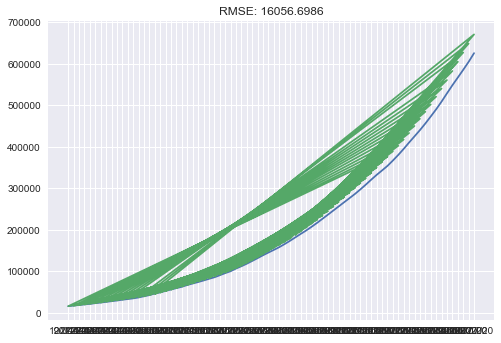

In [1482]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(PredAG1['Confirmed'])
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-PredAG1['Confirmed'])**2)/len(PredAG1['Confirmed'])))
plt.show()

# PREDICTING CURED CASES

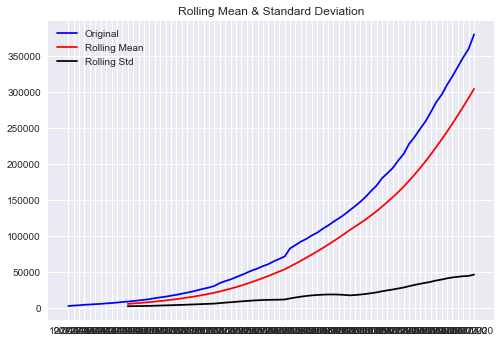

Results of Dickey-Fuller Test:
Test Statistic                 25.610098
p-value                         1.000000
#Lags Used                      0.000000
Number of Observations Used    75.000000
Critical Value (1%)            -3.520713
Critical Value (5%)            -2.900925
Critical Value (10%)           -2.587781
dtype: float64


In [1483]:
PredAG2 = PredAG.iloc[110:]
test_stationarity(PredAG1['Cured'])

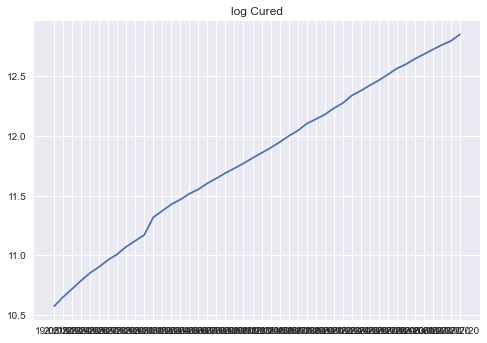

In [1484]:
ts_log1 = np.log(PredAG2['Cured'])
plt.plot(ts_log1)
plt.title('log Cured')
plt.show()

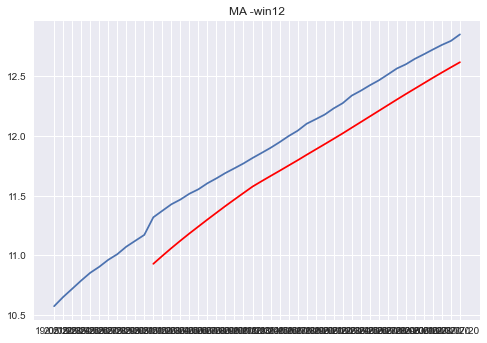

In [1485]:
moving_avg1 = pd.Series(ts_log1).rolling(window=12).mean()
plt.plot(ts_log1)
plt.plot(moving_avg1, color='red')
plt.title('MA -win12')
plt.show()

In [1486]:
ts_log_moving_avg_diff1 = ts_log1 - moving_avg1
ts_log_moving_avg_diff1.tail(12)

Date
22/06/20    0.262084
23/06/20    0.260290
24/06/20    0.254719
25/06/20    0.256662
26/06/20    0.259631
27/06/20    0.248587
28/06/20    0.249058
29/06/20    0.241859
30/06/20    0.236428
01/07/20    0.230759
02/07/20    0.220954
03/07/20    0.232492
Name: Cured, dtype: float64

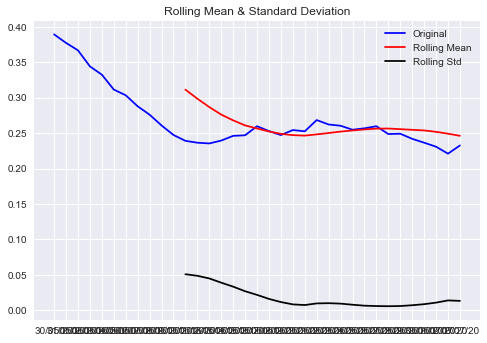

Results of Dickey-Fuller Test:
Test Statistic                 -4.447701
p-value                         0.000244
#Lags Used                      0.000000
Number of Observations Used    34.000000
Critical Value (1%)            -3.639224
Critical Value (5%)            -2.951230
Critical Value (10%)           -2.614447
dtype: float64


In [1487]:
ts_log_moving_avg_diff1.dropna(inplace=True)
test_stationarity(ts_log_moving_avg_diff1)

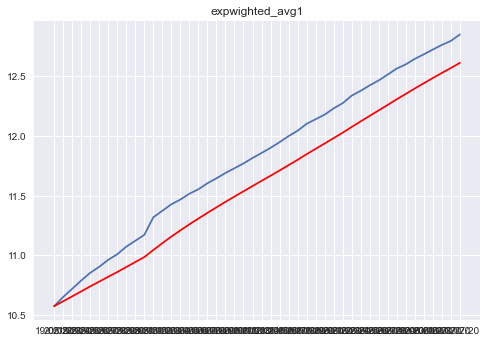

In [1488]:
expwighted_avg1 = pd.DataFrame.ewm(ts_log1, span=12).mean()
plt.plot(ts_log1)
plt.plot(expwighted_avg1, color='red')
plt.title('expwighted_avg1')
plt.show()

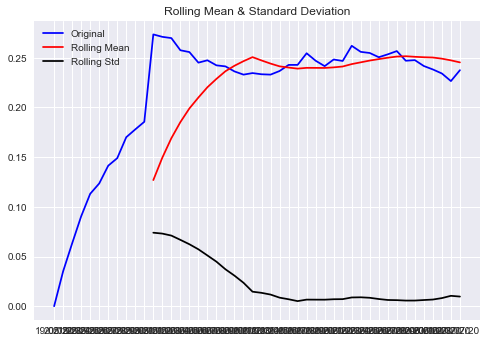

Results of Dickey-Fuller Test:
Test Statistic                 -3.185604
p-value                         0.020833
#Lags Used                      6.000000
Number of Observations Used    39.000000
Critical Value (1%)            -3.610400
Critical Value (5%)            -2.939109
Critical Value (10%)           -2.608063
dtype: float64


In [1489]:
ts_log_ewma_diff1 = ts_log1 - expwighted_avg1
test_stationarity(ts_log_ewma_diff1)

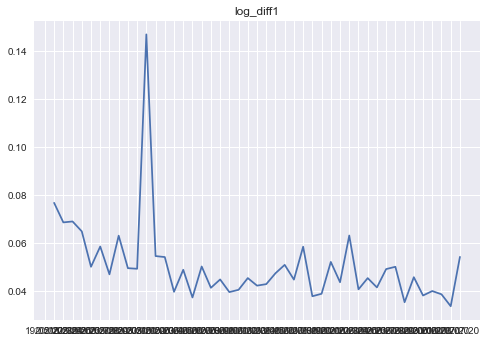

In [1490]:
ts_log_diff1 = ts_log1 - ts_log1.shift()
plt.plot(ts_log_diff1)
plt.title('log_diff1')
plt.show()

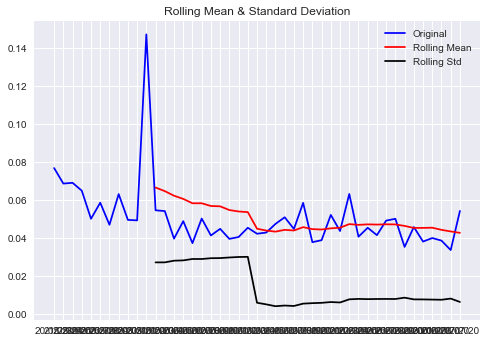

Results of Dickey-Fuller Test:
Test Statistic                 -3.705756
p-value                         0.004033
#Lags Used                      1.000000
Number of Observations Used    43.000000
Critical Value (1%)            -3.592504
Critical Value (5%)            -2.931550
Critical Value (10%)           -2.604066
dtype: float64


In [1491]:
ts_log_diff1.dropna(inplace=True)
test_stationarity(ts_log_diff1)

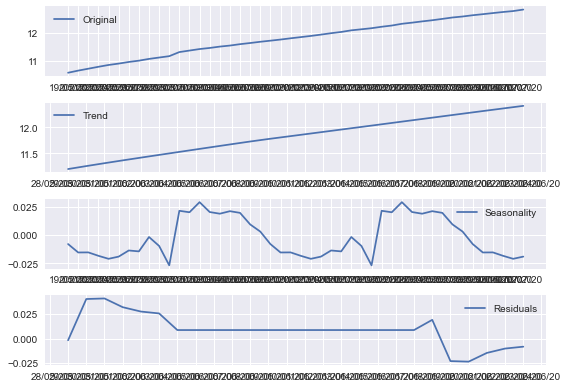

In [1492]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition1 = seasonal_decompose(ts_log1, period=20)

trend1 = decomposition1.trend
seasonal1 = decomposition1.seasonal
residual1 = decomposition1.resid

plt.subplot(411)
plt.plot(ts_log1, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend1, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal1,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual1, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

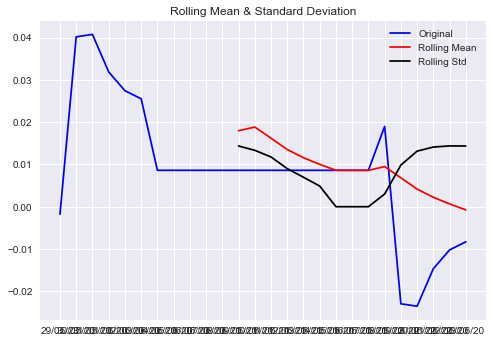

Results of Dickey-Fuller Test:
Test Statistic                 -1.999313
p-value                         0.286875
#Lags Used                      0.000000
Number of Observations Used    25.000000
Critical Value (1%)            -3.723863
Critical Value (5%)            -2.986489
Critical Value (10%)           -2.632800
dtype: float64


In [1493]:
ts_log_decompose1 = residual1
ts_log_decompose1.dropna(inplace=True)
test_stationarity(ts_log_decompose1)

C:\Users\SUDIP SINGH\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


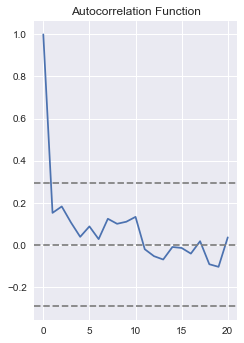

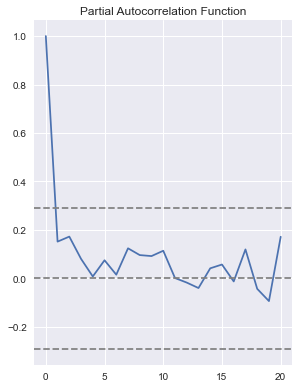

In [1494]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf
lag_acf1 = acf(ts_log_diff1, nlags=20)
lag_pacf1 = pacf(ts_log_diff1, nlags=20, method='ols')
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf1)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff1)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff1)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')
plt.show()
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf1)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff1)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff1)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()
plt.show()

C:\Users\SUDIP SINGH\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\SUDIP SINGH\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)
C:\Users\SUDIP SINGH\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\SUDIP SINGH\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  '

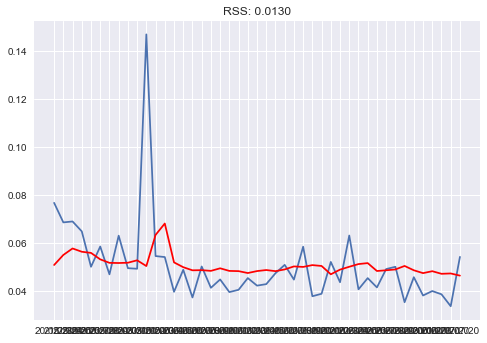

In [1495]:
model1 = ARIMA(ts_log1, order=(2, 1, 0))  
results_ARIMA1 = model1.fit(disp=-1)  
plt.plot(ts_log_diff1)
plt.plot(results_ARIMA1.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA1.fittedvalues-ts_log_diff1)**2))
plt.show()

C:\Users\SUDIP SINGH\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\SUDIP SINGH\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)
C:\Users\SUDIP SINGH\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\SUDIP SINGH\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  '

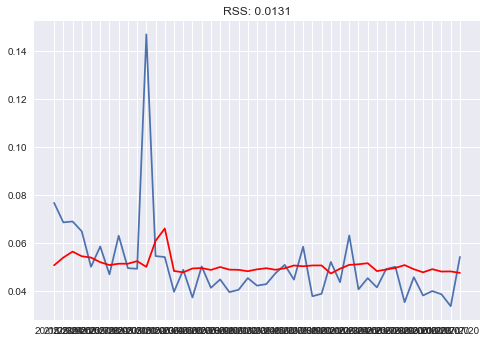

In [1496]:
model1 = ARIMA(ts_log1, order=(0, 1, 2))  
results_ARIMA1 = model1.fit(disp=-1)  
plt.plot(ts_log_diff1)
plt.plot(results_ARIMA1.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA1.fittedvalues-ts_log_diff1)**2))
plt.show()

C:\Users\SUDIP SINGH\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\SUDIP SINGH\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)
C:\Users\SUDIP SINGH\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\SUDIP SINGH\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  '

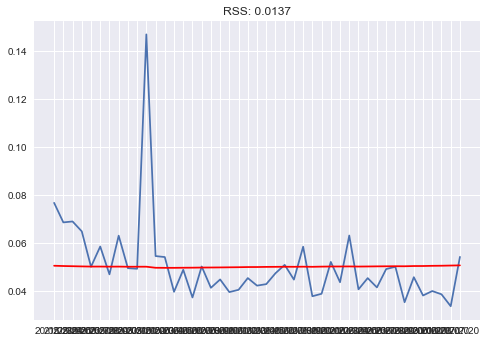

In [1497]:
model1 = ARIMA(ts_log1, order=(2, 1, 2))  
results_ARIMA1 = model1.fit(disp=-1)  
plt.plot(ts_log_diff1)
plt.plot(results_ARIMA1.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA1.fittedvalues-ts_log_diff1)**2))
plt.show()

In [1498]:
predictions_ARIMA_diff1 = pd.Series(results_ARIMA1.fittedvalues, copy=True)
print(predictions_ARIMA_diff1.head())

Date
20/05/20    0.050470
21/05/20    0.050354
22/05/20    0.050271
23/05/20    0.050190
24/05/20    0.050124
dtype: float64


In [1499]:
predictions_ARIMA_diff_cumsum1 = predictions_ARIMA_diff1.cumsum()
print(predictions_ARIMA_diff_cumsum1.head())

Date
20/05/20    0.050470
21/05/20    0.100824
22/05/20    0.151095
23/05/20    0.201285
24/05/20    0.251408
dtype: float64


In [1500]:
predictions_ARIMA_log1 = pd.Series(ts_log1[0], index=ts_log1.index)
predictions_ARIMA_log1 = predictions_ARIMA_log1.add(predictions_ARIMA_diff_cumsum1,fill_value=0)
predictions_ARIMA_log1.head()

Date
01/06/20    11.226915
01/07/20    12.728210
02/06/20    11.276510
02/07/20    12.778763
03/06/20    11.326148
dtype: float64

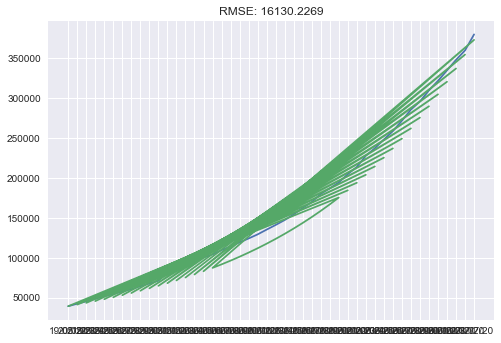

In [1501]:
predictions_ARIMA1 = np.exp(predictions_ARIMA_log1)
plt.plot(PredAG2['Cured'])
plt.plot(predictions_ARIMA1)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA1-PredAG2['Cured'])**2)/len(PredAG2['Cured'])))
plt.show()

# AS MORE DATA ARRIVES WE CAN REMOVE FURTHER EARLIEST DATA. WITH BETTER AND MORE DATA POINTS THE MODEL WILL IMPROVE FURTHER